In [1]:
#Cambio con respecto a SimulationTest5: se quitan las funciones de RutaRobot y RutaHumano y se modifica la función de generarpedido para generar todas
#posiciones y las rutas de una vez. Además se mejora las clases y las funciones getter y setter y se añade un import

In [2]:
# Import general
import pandas as pd
import numpy as np
import array

# Import para mapa
from matplotlib import pyplot
from matplotlib import colors
import pickle

#Import para generar ruta
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Import para clases
from abc import ABC

# Import para comprobar ruta
import copy

# Import para generar pedido
import random
from math import sqrt
from numpy import vectorize

# Import para Recopilar datos
from pathlib import Path

In [3]:
class Robot(ABC):
    def __init__(self, ID: int, vel: float, totes: int):
        self._ID = ID  # ID del robot
        self._vel: float = vel  # Velocidad del robot
        self._totes: int = 6  # Número de pedidos máximos del robot
        self._pos = (0, 0)  # Posición en matriz array, es un vector
        self._pedidos: int = 0  # Número de pedidos que ha realizado
        self._numpicks: int = 0  # Número de picks realizados
        self._picks: int = 0  # Vector de posiciones de picks del robot
        self._ruta = []  # Array de Arrays
        #self._vol = 0.0  # Volumen máximo de capacidad
        #self._pesomax = 0.0  # Peso máximo de capacidad

        self._proceso: int = 0  # Proceso que se encuentra el robot
        # 0: espera, 1: movimiento, 2: entrega

        self._dist: float = 0.0  # Distancia recorrida por el robot
        self._intersec: int = 0  # Intersecciones entre robots encontradas
        self._tiempoespera: float = 0.0  # Tiempo del robot esperando a humano
        self._tiempototal: float = 0.0  # Tiempo total del robot en el pedido
        self._tiempobateria: float = 0.0  # Tiempo del robot cargando la batería
        self._tiempodescarga: float = 0.0  # Tiempo del robot descargando los pedidos

    def get_ID(self) -> int:
        return self._ID

    def set_ID(self, ID: int):
        self._ID = ID

    def get_vel(self) -> float:
        return self._vel

    def set_vel(self, vel: float):
        if vel > 0:
            self._vel = vel

    def get_totes(self) -> int:
        return self._totes

    def set_totes(self, totes: int):
        if totes == 6 or totes == 9 or totes == 12:
            self._totes = totes

    def get_pos(self) -> array.array:
        return self._pos

    def set_pos(self, pos):
        self._pos = pos

    def get_pedidos(self) -> int:
        return self._pedidos

    def set_pedidos(self, pedidos):
        if pedidos > 0:
            self._pedidos = pedidos   

    def get_numpicks(self) -> int:
        return self._numpicks

    def set_numpicks(self, numpicks):
        if numpicks > 0:
            self._numpicks = numpicks  

    def get_picks(self) -> int:
        return self._picks

    def set_picks(self, picks):
        if picks > 0:
            self._picks = picks  

    def get_ruta(self) -> array.array:
        return self._ruta

    def set_ruta(self, ruta):
        if ruta > 0:
            self._ruta = ruta       

    """def get_vol(self) -> float:
        return self._vol
    def set_vol(self, vol: float):
        if vol > 0:
            self._vol = vol
    def get_pesomax(self) -> float:
        return self._pesomax
    def set_pesomax(self, pesomax: float):
        if pesomax > 0:
            self._pesomax = pesomax """

    def get_proceso(self) -> int:
        return self._proceso

    def set_proceso(self, proceso: int):
        if proceso >= 0 and proceso <= 3:
            self._proceso = proceso

    def get_dist(self) -> int:
        return self._dist

    def set_dist(self, dist: int):
        if dist >= 0:
            self._dist = dist

    def get_intersec(self) -> int:
        return self._intersec

    def set_intersec(self, intersec: int):
        if intersec >= 0:
            self._intersec = intersec

    def get_tiempoespera(self) -> float:
        return self._tiempoespera

    def set_tiempoespera(self, tiempoespera: float):
        if tiempoespera > 0:
            self._tiempoespera = tiempoespera

    def get_tiempototal(self) -> float:
        return self._tiempototal

    def set_tiempototal(self, tiempototal: float):
        if tiempototal > 0:
            self._tiempototal = tiempototal

    def get_tiempobateria(self) -> float:
        return self._tiempobateria

    def set_tiempobateria(self, tiempobateria: float):
        if tiempobateria > 0:
            self._tiempobateria = tiempobateria

    def get_tiempodescarga(self) -> float:
        return self._tiempodescarga

    def set_tiempodescarga(self, tiempodescarga: float):
        if tiempodescarga > 0:
            self._tiempodescarga = tiempodescarga


class Humano(ABC):
    def __init__(self, ID: int, vel: float, picktime: float):
        self._ID = ID  # ID del humano
        self._vel: float = 1.0  # Velocidad del humano
        self._pos = (0,0)  # Posición del humano en matriz
        self._ruta = "ruta" 
        self._picktime: float = 15.0  # Tiempo que tarda en hacer el pick
        self._dist: float = 0.0 # Distancia recorrida por el humano

        self._proceso: int = 0  # Proceso en el que está el humano
        # 0: parado, 1: pedido, 3: picking, 4: regreso

        self._tiempototal: float = 0.0  # Tiempo del humano en el pedido

    def get_ID(self) -> int:
        return self._ID

    def set_ID(self, ID: int):
        self._ID = ID

    def get_vel(self) -> float:
        return self._vel

    def set_vel(self, vel: float):
        if vel > 0:
            self._vel = vel

    def get_ruta(self) -> array.array:
        return self._ruta

    def set_ruta(self, ruta: array.array):
        self._ruta = ruta

    def get_pos(self):
        return self._pos

    def set_pos(self, pos):
        self._pos = pos

    def get_picktime(self) -> float:
        return self._picktime

    def set_picktime(self, picktime: float):
        if picktime > 0:
            self._picktime = picktime

    def get_dist(self) -> float:
        return self._dist

    def set_dist(self, dist: float):
        if dist > 0:
            self._dist = dist

    def get_proceso(self) -> int:
        return self._proceso

    def set_proceso(self, proceso: int):
        if proceso >= 0 and proceso <= 4:
            self._proceso = proceso

    def get_tiempototal(self) -> float:
        return self._tiempototal

    def set_tiempototal(self, tiempototal: float):
        if tiempototal > 0:
            self._tiempototal = tiempototal


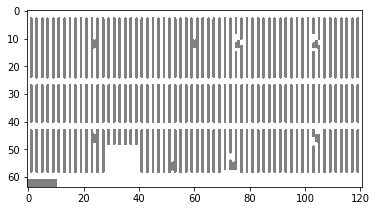

In [4]:
# Mapa Layout CTF

map_CTF = np.ones((64, 121))

for i in range(map_CTF.shape[1]):
    if (i % 2) == 0:
        map_CTF[:, i] = 0

map_CTF[:3, :] = 0
map_CTF[-5:, :] = 0
map_CTF[-3:, :11] = 1
map_CTF[25:27, :] = 0
map_CTF[41:43, :] = 0
map_CTF[-15:, 29:41] = 0
map_CTF[11:14, 24] = 1
map_CTF[45:48, 24] = 1
map_CTF[11:14, 60] = 1
map_CTF[11:14, 76] = 1
map_CTF[9:12, 75] = 0
map_CTF[14, 75] = 0
map_CTF[11:13, 77] = 0
map_CTF[-9:-6, 52] = 1
map_CTF[-9:-6, 74] = 1
map_CTF[-6, 70:77] = 0
map_CTF[11:14, 104] = 1
map_CTF[45:48, 104] = 1
map_CTF[9:12, 103] = 0
map_CTF[14, 103] = 0
map_CTF[11:13, 105] = 0
map_CTF[-12:-10, 73] = 0
map_CTF[46:49, 103] = 0
map_CTF[43:45, 105] = 0


list_CTF = map_CTF.tolist()


# Escritura en modo binario, vacía el fichero si existe
fichero = open("mapaTarancon_P1.pckl", "wb")

# Escribe la colección en el fichero
pickle.dump(list_CTF, fichero)

fichero.close()

"""
# Lectura en modo binario
fichero = open("mapaTarancon_P1.pckl", "rb")

# Cargamos los datos del fichero
lista_fichero = pickle.load(fichero)

fichero.close()
"""

colormap = colors.ListedColormap(["white", "grey"])
# entregando este problema a
pyplot.imshow(list_CTF, cmap=colormap)
pyplot.show()


In [5]:
# heuristic function for path scoring

#https://www.analytics-link.com/post/2018/09/14/applying-the-a-path-finding-algorithm-in-python-part-1-2d-square-grid
 
def heuristic(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)
 
# path finding function
 
def generar_ruta(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    #(1,1),(-1,1),(1,-1),(-1,-1) Quitamos movimientos diagonales
    close_set = set()

    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}

    oheap = []
    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []

            while current in came_from:

                data.append(current)
                current = came_from[current]
            data = data + [start]
            data = data[::-1]
            return data
        close_set.add(current)

        for i, j in neighbors:

            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)

            if 0 <= neighbor[0] < array.shape[0]:

                if 0 <= neighbor[1] < array.shape[1]:                

                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue

                else:

                    # array bound y walls
                    continue

            else:

                # array bound x walls
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):

                continue

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:

                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
 
    return False


In [6]:
# Función Generar Pedido

def distance(p1, p2):  # Función para calcular la distancia euclidiana y optimizar orden de ruta
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def generar_pos(section = 0, demanda = 0):

    i = 0
    # y es el valor que establece si el vector es correcto o no 
    # 0: incorrecto, 1: Correcto

    while i == 0:

        if demanda == 0:    # Generación de posición con demanda baja (todo el almacén)
            num1 = random.randint(1, 62) # Valor random del eje x
            num2 = random.randint(1, 120) # Valor random del eje y

        elif demanda == 1:    # Generación de posición con demanda alta (un tercio del almacén)
            num1 = random.randint(1, 62)

            if section == 1:
                num2 = random.randint(1, 40)
            elif section == 2:
                num2 = random.randint(40, 80)
            elif section == 3:
                num2 = random.randint(80, 119)

        x = 0 
        
        """x es el número de "0" que hay en las 9 posiciones contiguas a la
        selección. Si hay 4 o menos "0", la selección será válida
        (ya que no está en los pasillos). Si hay más de 4 "0" significa que
        está en un pasillo u otro espacio en el que no hay estantería"""

        # Comprueba las 9 casillas contiguas en las que hay "0"

        if map_CTF[num1 + 1, num2] == 0:
            x = x + 1

        if map_CTF[num1 + 1, num2 + 1] == 0:
            x = x + 1

        if map_CTF[num1, num2 + 1] == 0:
            x = x + 1

        if map_CTF[num1 - 1, num2 + 1] == 0:
            x = x + 1

        if map_CTF[num1 - 1, num2] == 0:
            x = x + 1

        if map_CTF[num1 - 1, num2 - 1] == 0:
            x = x + 1

        if map_CTF[num1, num2 - 1] == 0:
            x = x + 1

        # Comprueba que la posición está libre y hay 4 o menos casillas con "0"
        if x <= 4 and map_CTF[num1, num2] == 0:
            i = 1
            vector = np.array([num1, num2])

        # Caso en el que la selección no es válida
        if x > 4 or map_CTF[num1, num2] == 1:
            i = 0

    return (num1,num2)


def generar_pedido(totes, demanda, agente):

    i=0
    j=0
    vec = []

    agente._pedidos = pedidos = random.randint(1, totes) # Número de pedidos que se generarán dependiendo de los totes disponibles del robot (6, 9, 12)

    if demanda == 0:    # Baja demanda. Los robots se mueven por todo el almacén

        for i in range(pedidos):
            pick = random.randint(1, 4)     # Número de picks que habrá en cada pedido   

            for j in range(pick):

                pos = generar_pos()  # Genera una posición aleatoria
                vec.append(pos)   # Añade la posición al vector de picks
                

    if demanda == 1: # Alta demanda. Los robots se mueven en tres secciones divididas del almacén
        section = random.randint(1, 3)

        for i in range(pedidos):
            pick = random.randint(1, 4) # Número de picks que habrá en cada pedido

            for j in range(pick):

                pos = generar_pos(section, demanda) # Genera una posición aleatoria dependiendo de demanda
                vec.append(pos)    # Añade la posición al vector de picks
                
    vec.insert(0, agente._pos) # Añade la posición del robot al vector de picks
    agente._picks = ordenar_ruta(vec)
    agente._picks.pop(0) # pop porque se repetía el primer vector 2 veces por alguna razón


    #Llamada a generar_ruta para que vaya desde la posición de inicio a la posición del primer pedido

    agente._ruta = generar_ruta(map_CTF, agente._pos, agente._picks[0])
    

    #Llamada a generar_ruta para que haga una ruta en el orden de los vectores de agente._picks
    
    for i in range(len(agente._picks)-1):
        print("Start", agente._picks[i], "End", agente._picks[i+1])
        ruta = generar_ruta(map_CTF, agente._picks[i], agente._picks[i+1])

        for j in range(len(ruta)):
            agente._ruta.append(ruta[j])

    return agente._picks

#Function that orders vector of picks to execute the route with the shortest distance
def ordenar_ruta(ruta):
    
    ruta_ordenada = []
    ruta_ordenada.append(ruta[0])

    for i in range(len(ruta)):
        d_min = 100000

        for j in range(len(ruta)):
            d = distance(ruta_ordenada[i], ruta[j])

            if d < d_min:
                d_min = d
                pos_min = ruta[j]
                pos_min_index = j

        ruta_ordenada.append(pos_min)
        ruta.pop(pos_min_index)

    return ruta_ordenada




In [7]:
%%time

r1 = Robot(1, 0.9, 12)
r1._pos = generar_pos()

result = generar_pedido(r1._totes, 1, r1)

Start (46, 94) End (38, 98)
Start (38, 98) End (8, 102)
CPU times: user 7.57 ms, sys: 1.71 ms, total: 9.28 ms
Wall time: 21.6 ms



Picks:  [(46, 94), (38, 98), (8, 102)]

Ruta.  [(46, 94), (46, 94), (45, 94), (44, 94), (43, 94), (42, 95), (41, 96), (41, 97), (40, 98), (39, 98), (38, 98), (38, 98), (37, 98), (36, 98), (35, 98), (34, 98), (33, 98), (32, 98), (31, 98), (30, 98), (29, 98), (28, 98), (27, 98), (26, 99), (25, 100), (25, 101), (24, 102), (23, 102), (22, 102), (21, 102), (20, 102), (19, 102), (18, 102), (17, 102), (16, 102), (15, 102), (14, 102), (13, 102), (12, 102), (11, 102), (10, 102), (9, 102), (8, 102)]

Distancia:  43


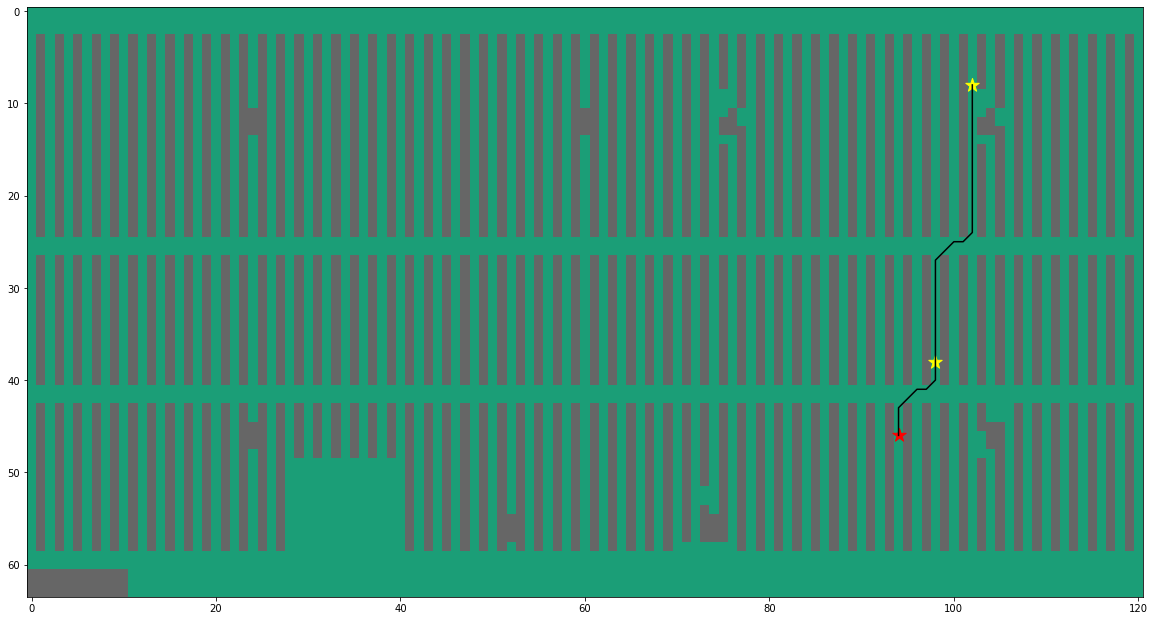

IndexError: index 121 is out of bounds for axis 1 with size 121

In [8]:


print("\nPicks: ", r1._picks)
print("\nRuta. ", r1._ruta)
print("\nDistancia: ", len(r1._ruta))

# plot map and path

x_coords = []
y_coords = []

for i in (range(0,len(r1._ruta))):

    x = r1._ruta[i][0]
    y = r1._ruta[i][1]

    x_coords.append(x)
    y_coords.append(y)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(map_CTF, cmap=plt.cm.Dark2)
ax.scatter(r1._pos[1],r1._pos[0], marker = "*", color = "red", s = 200)

for i in range(1,len(r1._picks)):
    ax.scatter(r1._picks[i][1],r1._picks[i][0], marker = "*", color = "yellow", s = 200)

ax.plot(y_coords,x_coords, color = "black")

plt.show()


result = generar_pedido(r1._totes, 0, r1)

print("\nPicks: ", r1._picks)
print("\nRuta. ", r1._ruta)
print("\nDistancia: ", len(r1._ruta))

# plot map and path

x_coords = []
y_coords = []

for i in (range(0,len(r1._ruta))):

    x = r1._ruta[i][0]
    y = r1._ruta[i][1]

    x_coords.append(x)
    y_coords.append(y)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(map_CTF, cmap=plt.cm.Dark2)
ax.scatter(r1._pos[1],r1._pos[0], marker = "*", color = "red", s = 200)

for i in range(1,len(r1._picks)):
    ax.scatter(r1._picks[i][1],r1._picks[i][0], marker = "*", color = "yellow", s = 200)

ax.plot(y_coords,x_coords, color = "black")

plt.show()

